# Reading Halo Catalogs

In [1]:
import numpy as np
import json

We can access some of the metadata by reading the JSON files:
some relevants parameters:

```
'L': 1000.0  # box size in units onf Mpc/h
'a_stop': 0.665314958, #scale factor, to get redshift -> z = 1-1/parameter_file['a_stop']

# cosmological parameters
'sigma8': 0.834
'n_s': 0.9624
'Omega_m': 0.3175
'Omega_b': 0.049
'h': 0.6711
'fnl_loc_': 294.45 # fnl local amplitude 
'fnl_equil_': None # fnl equilateral amplitude 

# Particle mass in Msun/h
'pmass': 656509507865.6692
```

In [ ]:
# read some meta data from the simulations
param_path = f'Halo_catalogs/LH_LC300/pmwd_halos_run1.json'
parameter_file = json.load(open(param_path))
parameter_file

{'cosmo': 'LC',
 'root_output': '/home/jcalles/Projects/pmwd/pmwd_halos_final',
 'seed': 15,
 'run': 1,
 'saveData': True,
 'fnl': 294.45,
 'L': 1000.0,
 'npart': 512,
 'a_start': 0.1,
 'a_stop': 0.665314958,
 'a_nbody_maxstep': 0.0282657479,
 'sigma8': 0.834,
 'n_s': 0.9624,
 'Omega_m': 0.3175,
 'Omega_b': 0.049,
 'h': 0.6711,
 'fnl_loc_': 294.45,
 'fnl_equil_': None,
 'b': 0.2,
 'pmass': 656509507865.6692,
 'nmin': 19,
 'Np_min': 50}

In [ ]:
# read the halo catalogue
halo_path = f'Halo_catalogs/LH_LC300/pmwd_halos_run1.npz'
mycat = np.load(halo_path)

redshift = 1-1/parameter_file['a_stop']

# get the properties of the halos
pos_h    = mycat['pos'][:,1:]                        # shape: (3, :); position in real space in Mpc/h
vel_h    = mycat['vel'][:,1:]*100.*(1. + redshift)   # shape: (3, :); peculiar velocities in km/s
masses_h = mycat['mass'][1:]                         # shape: (:,) Halo masses in Msun/h
N_p      = mycat['np_h'][1:]                         # shpae: (:,) Number of particles in the halo

Text(0, 0.5, 'y [Mpc/h]')

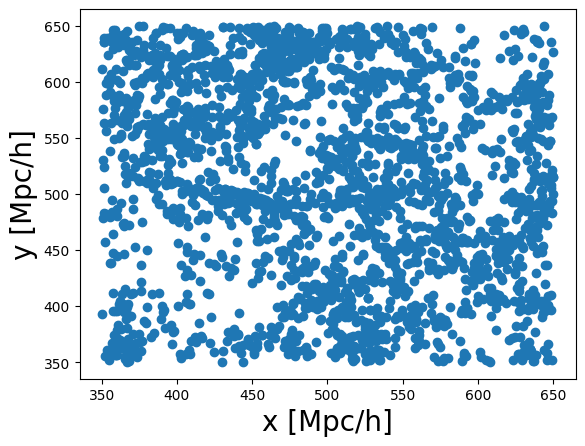

In [4]:
import matplotlib.pyplot as plt

indexes = (
    (pos_h[0, :] >= 350) & (pos_h[0, :] <= 650) &
    (pos_h[1, :] >= 350) & (pos_h[1, :] <= 650) &
    (pos_h[2, :] >= 450) & (pos_h[2, :] <= 550)
)

pos_slice = pos_h[:2,indexes]

plt.scatter(pos_slice[0, :], pos_slice[1, :])

plt.xlabel('x [Mpc/h]', fontsize=20)
plt.ylabel('y [Mpc/h]', fontsize=20)


# PowerSpectrum Files

In [5]:
import numpy as np

Let's read a file and remind the reader that the PMWD Suite contains different cosmologies:

cosmo = 
- 'fiducial': $\Omega_m=0.3175$, $\Omega_b=0.049$ , $\sigma_8=0.834$, $h=0.6711$, $n_s=0.9624$
- 'LC300': local type templte with $f_{\rm NL}^{\rm loc} = [-300,300]$
- 'LC50' : local type templte with $f_{\rm NL}^{\rm loc} = [-50,50]$
- 'EQ600': equilateral templet with $f_{\rm NL}^{\rm equil} = [-600,600]$
- 'EQ250': equilateral templet with $f_{\rm NL}^{\rm equil} = [-250,250]$
- 'LC\_om\_s8': \Omega_m=[0.2825,0.3525]$  $\sigma_8 = [0.804,0.864]$  $f_{\rm NL}^{\rm loc} = [-50,50]$
- 'EQ\_om\_s8': \Omega_m=[0.2825,0.3525]$  $\sigma_8 = [0.804,0.864]$  $f_{\rm NL}^{\rm equil} = [-250,250]$

And the mass bins are defined as:
- mbin0 : HFull   = $[3.28\times10^{13},\ \infty)$  in Msun/h,
- mbin1 : HLow-A  = $[3.28,\ 4.46)\times10^{13}$    in Msun/h,
- mbin2 : HLow-B  = $[4.46,\ 7.09)\times10^{13}$    in Msun/h,
- mbin3 : HMid:   = $[7.09\times10^{13},\ \infty)$  in Msun/h,
- mbin4 : HMid-A  = $[7.09,\ 9.06)\times10^{13}$    in Msun/h,
- mbin5 : HMid-B  = $[9.06,\ 13.26)\times10^{13}$   in Msun/h,
- mbin6 : HHigh   = $[13.26\times10^{13},\ \infty)$ in Msun/h,

And we provide measurements on Realspace and Redshift-space distortions

- Real space tag: `real`
- Redshift-space distortions (RSD): `irsd3`

Let's read a powerspectrum file for the LC cosmology, mass bin "0", and run 1

In [ ]:
cosmo = 'LC300'
space='irsd3'
massbin_tag = 'mbin0'
run = 1


ps_path = f'psbs/LH_{cosmo}/powerspectrum_hh_pmwd_{space}_{cosmo}_{massbin_tag}_run{run}_grid144_z0p503.dat'
k, avgk, P0PSN, P2,  P4, Nmodes, PSN = np.loadtxt(ps_path, unpack=True)

P0 = P0PSN - PSN            # PS monopole

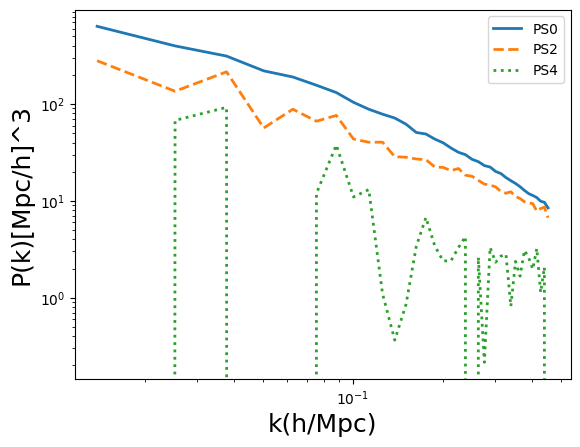

In [7]:
import matplotlib.pyplot as plt

plt.loglog(avgk, P0, linestyle='-' , linewidth=2, label = 'PS0')
plt.loglog(avgk, P2, linestyle='--', linewidth=2, label = 'PS2')
plt.loglog(avgk, P4, linestyle=':' , linewidth=2, label = 'PS4')

plt.legend()
plt.xlabel('k(h/Mpc)', fontsize=18)
plt.ylabel('P(k)[Mpc/h]^3', fontsize=18)

plt.show()

# Bispectrum Files

In [ ]:
import numpy as np

cosmo = 'LC'
space='irsd3'
massbin = 'mbin0'
run = 1

similarly for the bispectrum

In [ ]:
bs_path= f'psbs/LH_{cosmo}/bispectrum_hhh_pmwd_{space}_{cosmo}_{massbin_tag}_run{run}_grid144_z0p503.dat'

kF = 2*np.pi/1000. # fundamental mode in units of h/Mpc
k1, k2, k3, Pk1, Pk2, Pk3, B0BSN, BSN, N_tr, B2, B4 = np.loadtxt(bs_path, unpack=True)

# to set k1,k2,k3 in units of h/Mpc, multiply by kF
k1, k2, k3 = k1*kF, k2*kF, k3*kF

B0 = B0BSN - BSN  # we subtract the Poisson shot noise to the bispectrum 'B0(k1,k2,k3) [Mpc/h]^6'

Text(0, 0.5, 'B0(k1,k2,k3) [Mpc/h]^6')

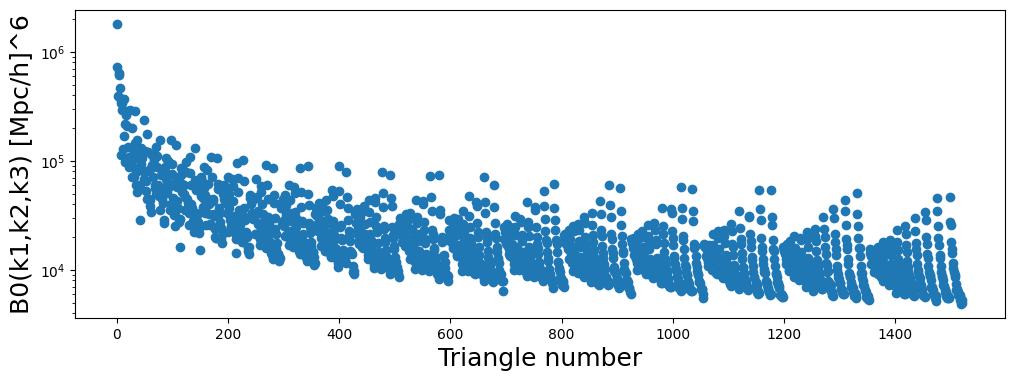

In [11]:
fig = plt.figure(figsize=(12, 4))
plt.scatter(np.arange(k3.shape[0]),B0)

plt.yscale('log')
plt.xlabel('Triangle number', fontsize=18)
plt.ylabel('B0(k1,k2,k3) [Mpc/h]^6', fontsize=18)